# Data Project - Stock Market Analysis

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks.  We will use **Pandas** to visualize different aspencts of them, look at a few ways of analyzing the risk of a stock based on its performance history, and finally we will predict future stock prices through a Monte Carlo simulation.

We will be answering the following questions along the way:
1. What was the change in stock price over time?
2. What was the moving average of the various stocks?
3. What was the average daily return of the stock?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

### Part 0: Preliminary

In this section, we will import the various modules and set up plot styles that will be employed for this project.

In [1]:
# For data processing and plotting
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# For accessing Yahoo Finance data (also works on Google Finance)
from pandas_datareader import data, wb

In [3]:
# For handling of datetime objects
from datetime import datetime

### Part 1: Load data from Yahoo Finance

In this section, we will write a short script to access a few tech stock data provided by Yahoo Finance.  Specifically, we will look at Apple, Google, Microsoft, and Amazon.  In order to access their stock data, we will need to use their stock tickers:

- Apple: **AAPL**
- Google: **GOOG**
- Microsoft: **MSFT**
- Amazon: **AMZN**

In [7]:
# Parameter initialization
duration = 1  # number of years of data we want to retrieve
end = datetime.now()  # end date
start = datetime(end.year-duration, end.month, end.day)  # start date

# List of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Obtain dataframe of stock data
# Here, globals() turns the stock ticker name into a variable name.
for stock in tech_list:
    globals()[stock] = data.DataReader(name=stock, data_source='yahoo', start=start, end=end)

Let's take a peek at Apple.

In [8]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.412537
2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.599533
2020-06-26,91.330002,88.254997,91.102501,88.407501,205256800.0,87.815788
2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,89.839653
2020-06-30,91.495003,90.000000,90.019997,91.199997,140223200.0,90.589600


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-24 to 2021-06-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,122.394516,119.335247,120.971275,120.885968,1.215896e+08,120.510767
std,11.908170,11.797665,11.950984,11.851822,5.326737e+07,11.976437
min,90.542503,87.820000,88.312500,88.407501,3.715381e+07,87.815788
25%,116.650002,113.620003,115.279999,115.169998,8.693980e+07,114.754700
50%,124.639999,121.199997,123.160004,122.940002,1.076244e+08,122.687958
75%,130.710007,127.860001,128.960007,129.639999,1.461292e+08,129.490051
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


Great!  We have successfully created dataframes for each of the listed tech stocks.

For this analysis, we will use the *Adjusted Closing Price*.  Adjusted Closing Price is the amended closing price to reflect a stock's value accounting for any corporate actions, such as stock splits, dividends, and rights offerings.  It is often used when examining historical returns or doing a detailed analysis of past performance.

### Part 2: Questions

##### Question 1. What was the change in stock price over time?

Let's take a look at the adjusted closing prices for the four tech stocks.

In [11]:
# Let's first build a dataframe containing the adjusted closing prices for the four stocks.
adjusted_closing_df = pd.concat([AAPL['Adj Close'], GOOG['Adj Close'],
                                 MSFT['Adj Close'], AMZN['Adj Close']], axis=1)
adjusted_closing_df.columns = ['AAPL','GOOG','MSFT','AMZN']
adjusted_closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-24,89.412537,1431.969971,195.942780,2734.399902
2020-06-25,90.599533,1441.329956,198.418793,2754.580078
2020-06-26,87.815788,1359.900024,194.447235,2692.870117
2020-06-29,89.839653,1394.969971,196.537018,2680.379883
2020-06-30,90.589600,1413.609985,201.558395,2758.820068


<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

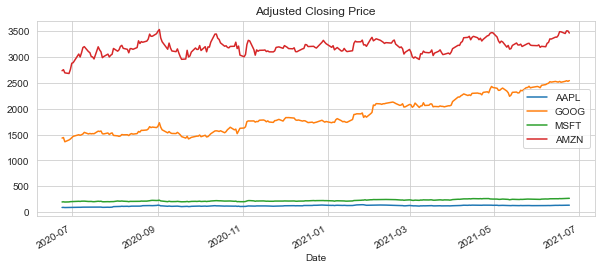

In [12]:
adjusted_closing_df.plot(title = 'Adjusted Closing Price', legend=True, figsize=(10,4))

Amazon stocks are the most expensive followed by Google stocks.  Both are showing a positive trend.  Microsoft and Apple stocks are much cheaper relative to Amazon and Google.  Their growth trends are hard to tell from this graph.  Let's plot them separately.

<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

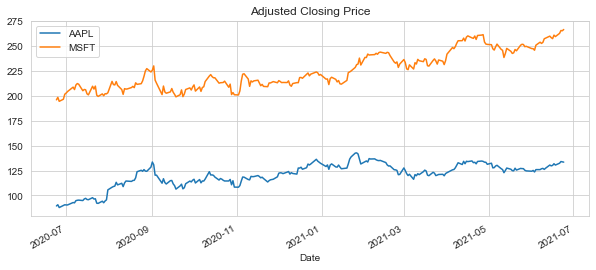

In [13]:
adjusted_closing_df[['AAPL',
                     'MSFT']].plot(title = 'Adjusted Closing Price', legend=True, 
                                   figsize=(10,4))

As shown above, both Apple and Micrsoft also display positive growth trends.

We can also see how the stock prices change from day to day by taking the difference of the stock prices with the day prior by using the `.diff()` method.

<AxesSubplot:title={'center':'Price Change'}, xlabel='Date'>

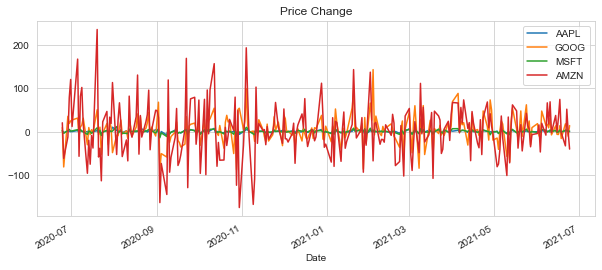

In [14]:
adjusted_closing_df.diff().plot(title = 'Price Change', legend=True, figsize=(10,4))

The graph above is very hard to see.  Let's separate out each individual stock into its own price change graph by specifying more parameters in the `.plot()` method.

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

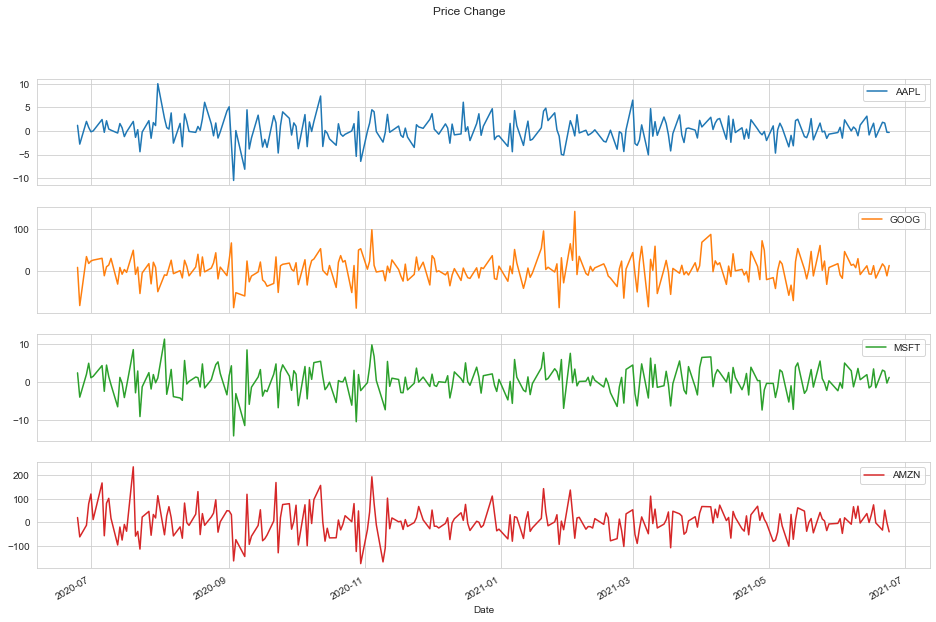

In [15]:
adjusted_closing_df.diff().plot(title = 'Price Change', 
                                legend=True, 
                                figsize=(16,10),
                                subplots=True,
                                layout=(4,1))

We can repeate similar steps to view how the trade volumes fluctuate over time.  But here we will use a more efficient way of building our trade volume dataframe by invoking `data.DataReader` again but only retrieve the **Volume** data.

In [16]:
volume_df = data.DataReader(name=tech_list, 
                            data_source='yahoo', 
                            start=start, 
                            end=end)['Volume']
volume_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-24,192623200.0,1756000.0,36740600.0,4526600.0
2020-06-25,137522400.0,1230500.0,27803900.0,2968700.0
2020-06-26,205256800.0,4267700.0,54675800.0,6500800.0
2020-06-29,130646000.0,1810200.0,26701600.0,4223400.0
2020-06-30,140223200.0,2042400.0,34310300.0,3769700.0


array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

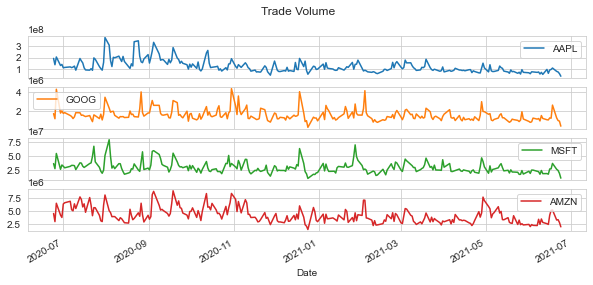

In [17]:
volume_df.plot(title='Trade Volume',
               legend=True,
               figsize=(10,4),
               subplots=True,
               layout=(4,1))

Note that the trade volumes correspond to each other fairly well.  Also, even though Apple stocks are the cheapest, Apple's trade volume is almost two orders of magnitude higher than Amazon, the priciest stock of all four.

##### 2. What was the moving average of the various stocks?

A moving average (MA) is a stock indicator that is commonly used in technical analysis.  The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.  A simple moving average is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.

Let's take a look at moving averages for the Apple stock.  We will insert the moving averages as separate columns of data to the AAPL dataframe.  We will use the `.rolling()` method to provide a window for calculation.  We will then invoke the `.mean()` method to calculate the average.

In [18]:
# Initialize the number of days for averaging.
ma_days = [10, 20, 50]

for days in ma_days:
    col_name='%s days MA' %(str(days))
    AAPL[col_name] = AAPL['Adj Close'].rolling(window=days, center=True).mean()

In [19]:
AAPL.head(30)

,High,Low,Open,Close,Volume,Adj Close,10 days MA,20 days MA,50 days MA
Date,,,,,,,,,
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.412537,NaN,NaN,NaN
2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.599533,NaN,NaN,NaN
2020-06-26,91.330002,88.254997,91.102501,88.407501,205256800.0,87.815788,NaN,NaN,NaN
2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,89.839653,NaN,NaN,NaN
2020-06-30,91.495003,90.000000,90.019997,91.199997,140223200.0,90.589600,NaN,NaN,NaN
2020-07-01,91.839996,90.977501,91.279999,91.027496,110737200.0,90.418251,90.918383,NaN,NaN
2020-07-02,92.617500,90.910004,91.962502,91.027496,114041600.0,90.418251,91.488293,NaN,NaN
2020-07-06,93.945000,92.467499,92.500000,93.462502,118655600.0,92.836960,91.956142,NaN,NaN
2020-07-07,94.654999,93.057503,93.852501,93.172501,112424400.0,92.548889,92.658410,NaN,NaN


Great!  We have successfully generated the moving averages at 10-day, 20-day, and 50-day windows.  Note the `NaN` entries at the beginning of each moving average column, that is due to the required number of entries to compute the moving averages.  If we look at the tail of the dataframe, we will see the same numbers of `NaN` entries at the end.

In [20]:
AAPL.tail(30)

,High,Low,Open,Close,Volume,Adj Close,10 days MA,20 days MA,50 days MA
Date,,,,,,,,,
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.970001,126.349001,127.470100,129.001608
2021-05-14,127.889999,125.849998,126.250000,127.449997,81918000.0,127.449997,126.128000,127.071416,129.008029
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997,125.649999,126.740062,128.998539
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.849998,125.674999,126.338300,129.057790
2021-05-19,124.919998,122.860001,123.160004,124.690002,92612000.0,124.690002,125.773999,126.209639,129.047749
2021-05-20,127.720001,125.099998,125.230003,127.309998,76857100.0,127.309998,126.181999,125.992500,129.079627
2021-05-21,128.000000,125.209999,127.820000,125.430000,79295400.0,125.430000,126.212999,125.811000,NaN
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,127.099998,125.928999,125.595499,NaN
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.900002,125.730000,125.589999,NaN


Let's graph the moving averages along with the adjusted closing price.

<AxesSubplot:xlabel='Date'>

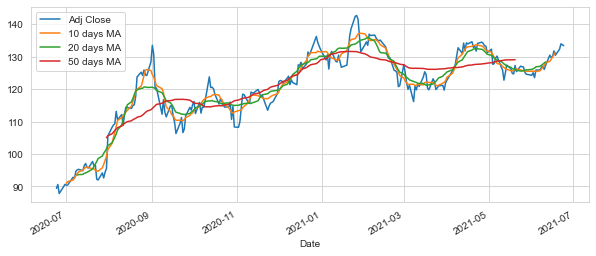

In [21]:
AAPL[['Adj Close', '10 days MA', '20 days MA', '50 days MA']].plot(legend=True, figsize=(10,4))

Notice that the wider the moving average window is (more days), the smoother the curve looks (red curve vs. blue curve) and shorter the curve (due to the `NaN` entries at the beginning and at the end of the calculated moving averages).

[Investopedia](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) offers more explanation on how to use these moving averages.

##### 3. What was the average daily return of the stock?

To see the daily return, we will use Pandas built-in function of `.pct_change()`.  It essentially calcuates a percent change of the current entry from the previous entry across the entire data series.  Since the first entry has no previous entry, it will receive an `NaN`.

We will again work with AAPL.  Let's create another data series in the AAPL dataframe to capture the daily return.

In [22]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change().dropna()
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,10 days MA,20 days MA,50 days MA,Daily Return
Date,,,,,,,,,,
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.412537,NaN,NaN,NaN,NaN
2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.599533,NaN,NaN,NaN,0.013276
2020-06-26,91.330002,88.254997,91.102501,88.407501,205256800.0,87.815788,NaN,NaN,NaN,-0.030726
2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,89.839653,NaN,NaN,NaN,0.023047
2020-06-30,91.495003,90.000000,90.019997,91.199997,140223200.0,90.589600,NaN,NaN,NaN,0.008348


Let's visualize this new data series.

<AxesSubplot:xlabel='Date'>

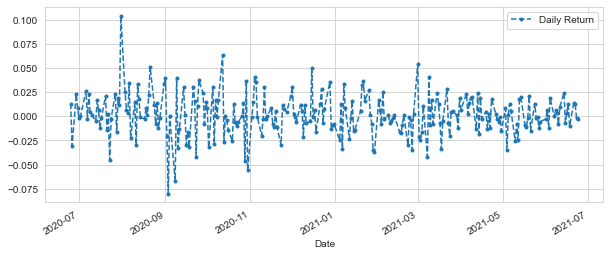

In [23]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, marker='.', style='--')

The graph above shows the daily returns but it's hard to see what the average daily return is.  We can generate a histogram and get a glimpse of the daily return distribution by using the seaborn `.histplot()` with the **kde** parameter set to true.

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

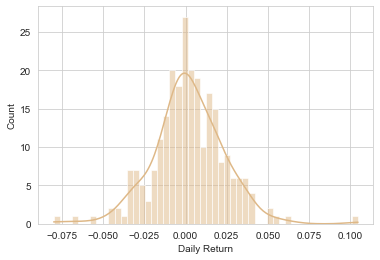

In [24]:
sns.histplot(AAPL['Daily Return'], kde=True, bins=50, color='burlywood')

This daily return distribution for AAPL resembles a normal distribution with a slight positive skew.

Let's now get the daily returns of all four tech stocks by building another dataframe containining only adjusted closing prices.  Then we will invoke the `.pct_change()` method on that dataframe to obtain another dataframe containing the daily returns.

In [34]:
# Use the DataReader to access Yahoo Finance data.
# Here we are only interested in obtaining the "Adj Close" data series.
tech_prices = data.DataReader(name=tech_list,
                               data_source='yahoo',
                               start=start,
                               end=end)['Adj Close']

In [35]:
# Let's create another dataframe to capture the daily returns.
tech_returns = tech_prices.pct_change().dropna()
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-25,0.013276,0.006536,0.012636,0.007380
2020-06-26,-0.030726,-0.056496,-0.020016,-0.022403
2020-06-29,0.023047,0.025789,0.010747,-0.004638
2020-06-30,0.008348,0.013362,0.025549,0.029265
2020-07-01,-0.001891,0.017282,0.005847,0.043453


Now that we have the daily returns, we can see how they correlate with each other by using the seaborn `.jointplot()` method.

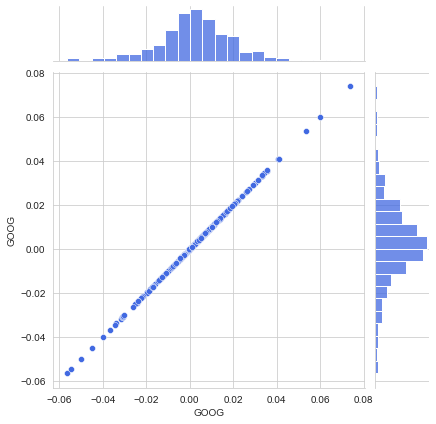

In [36]:
sns.jointplot(data=tech_returns, x='GOOG', y='GOOG', kind='scatter', color='royalblue')

In the chart above, we compare GOOG with GOOG itself.  We see that if two stocks are perfectly and positively correlated with each other, the scatter plot would show a linear relationship. 

Armed with that knowledge, let's go ahead and compare AAPL with GOOG.

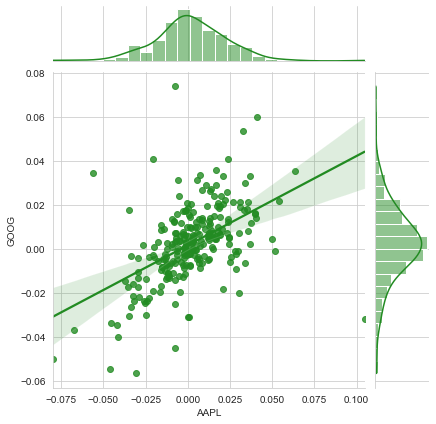

In [37]:
sns.jointplot(data=tech_returns, x='AAPL', y='GOOG', kind='reg', color='forestgreen')

This joint plot shows the individual histograms of the two stocks as well as a linear regression of the scatter plot.  We again see that both AAPL and GOOG are fairly normally distributed, and they are somewhat linearly correlated.  To understand the strength of the correlation, we can envoke SciPy's **stats** module and calculate the Pearson's R (or the correlation coefficient) and the associated p-value.

***

###### Side Note 1: Pearson's R

Pearson's R is a measure of linear correlation between two sets of data.  It is the covariance of two variables, divided by the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.  As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.  The coefficient also does not reflect the slope of the regression line.  See the figure below.

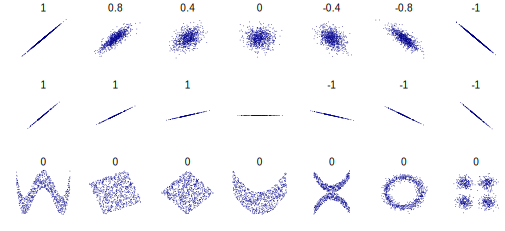

In [39]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

The figure above shows several sets of (x, y) points, with the correlation coefficient of x and y for each set.  Note that the correlation reflects the strength and direction of a linear relationship (top row), but not the slope of that relationship (middle row), nor many aspects of nonlinear relationships (bottom row).

Mathematically, Pearson's R can be calculated as follow:

$$\rho = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

More information about the Pearson's R can be found on [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

***

###### Side Note 2: P-Value

In null hypothesis significance testing, the p-value is the *probability* of obtaining test results *at least as extreme* as the results actually observed, under the assumption that the null hypothesis is correct.  (A null hypothesis in this study is that the two stocks in interest are not correlated, or the Pearson's R is 0.)  A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.  Therefore, if we observe a small p-value, we can safely reject the null hypothesis and consider the alternate hypothesis.  (In this case, the alternate hypothese is that the two stocks are correlated or the Pearson's R is not 0.)  A common threshold for p-value is 0.05.  A p-value < 0.05 is considered statistically significant.

More information about the p-value can be found [here](https://en.wikipedia.org/wiki/P-value).

***

Let's get back to our analysis and calculate the Pearson's R and the p-value for GOOG and AMZN.

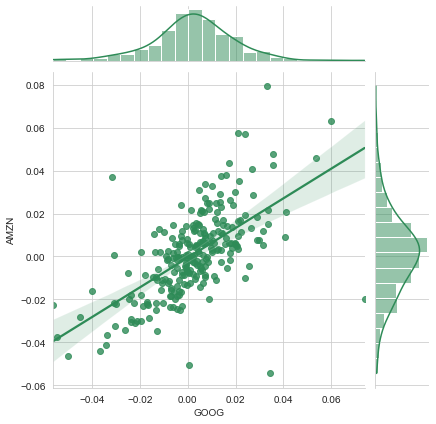

In [40]:
sns.jointplot(data=tech_returns, x='GOOG', y='AMZN', kind='reg', color='seagreen')

In [41]:
from scipy import stats

In [42]:
r, p = stats.pearsonr(tech_returns['GOOG'], tech_returns['AMZN'])
print("Pearson's r is %.2f." %r)
print('The p-value is %.2e.' %p)

Pearson's r is 0.62.
The p-value is 3.85e-28.


We see that GOOG and AMZN returns are linearly correlated with a Pearson's R at 0.62.  Because the p-value is so small, this finding is statistically significant!  In other words, if we see a positive return on GOOG, we can somewhat expect a positive return on AMZN.  Since both stocks are powerhouses in the tech stocks, this finding is expected.

##### 4. What was the correlation between different stocks' closing prices?

Seaborn offers a pretty convenient wrapper function to allow us to visualize pair-wise correlation amongst all numerical variables.  The function is `sns.pairplot()`.

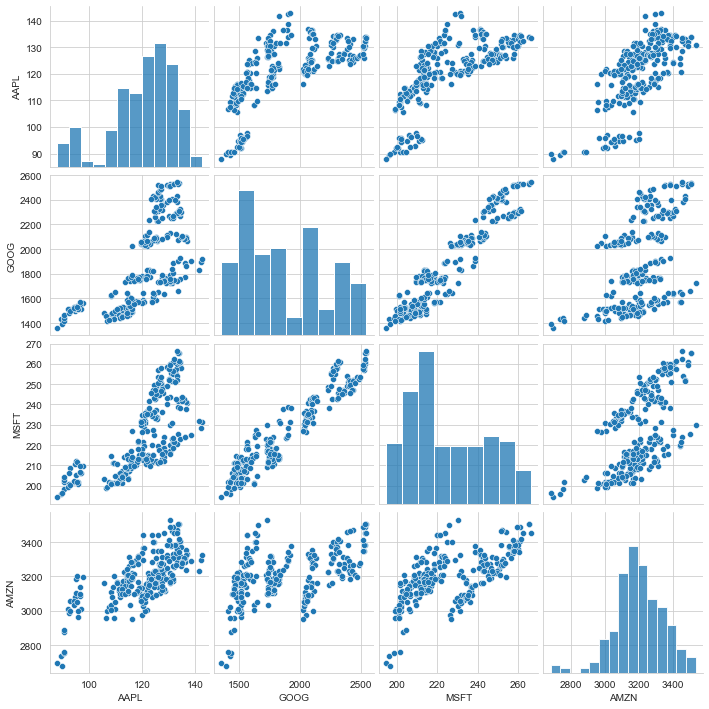

In [43]:
sns.pairplot(data=tech_prices)

We see that there appears to be a linear correlation between the adjusted closing price of MSFT and GOOG (*look at the graph on the second row and the third column or the graph at the third row and second column.*)

##### 5. What was the correlation between different stocks' daily returns?

We could use the same `sns.pairplot()` function to see the correlations of the tech stock returns.  But we can also the more flexible `sns.PairGrid()` function, upon which `sns.pairplot()` is built, to access more capability.

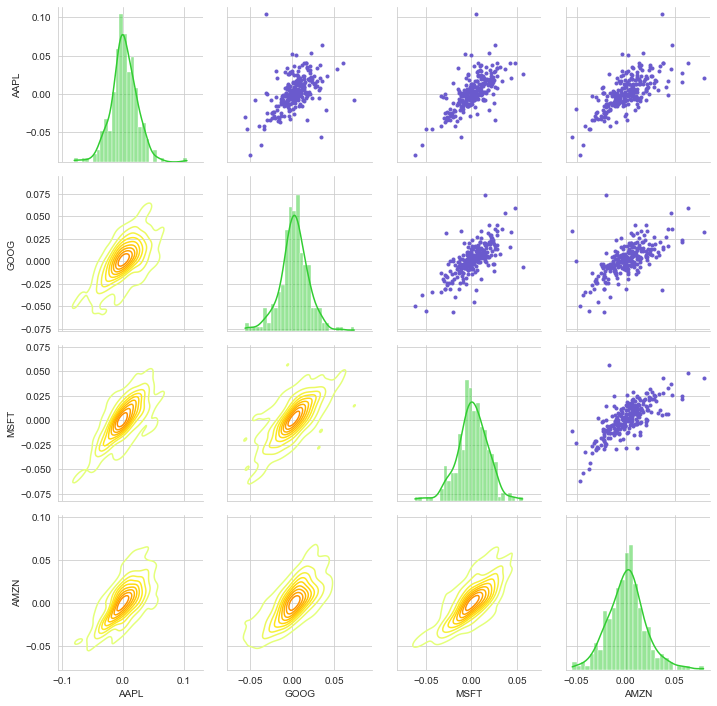

In [44]:
# Let's first define a variable name to hold our figure.
return_fig = sns.PairGrid(data=tech_returns, dropna=True)

# We can now manipulate the upper triangle, the lower triangle and the diagonal plots individually.
# We can use .map_upper() to map a plot type to the upper triangle.  We can use matplotlib.pyplot plots.
return_fig.map_upper(plt.scatter, color='slateblue', marker='.')

# We can use .map_lower() to map another plot type to the lower triangle.  We can use seaborn plots.
return_fig.map_lower(sns.kdeplot, cmap='Wistia')

# Finally, we can use .map_diag() to map yet another plot type to the diagonal.
return_fig.map_diag(sns.histplot, bins=30, kde=True, color='limegreen')

With the graph above, we can see in one glance the correlation amongst all tech stock returns as well as their individual return distribution.  As shown in the graph, all four tech stocks are exhibiting some linear correlation as demonstrated in the upper triangle scatter plot as well as the oblonge kde plots in the lower triangle.

If we want to see the correlation coefficients, we can calculate them by using the pandas `.corr()` method on the dataframe.

In [45]:
tech_returns.corr()

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.500668,0.684724,0.681445
GOOG,0.500668,1.000000,0.700285,0.619860
MSFT,0.684724,0.700285,1.000000,0.735558
AMZN,0.681445,0.619860,0.735558,1.000000


We can visualize this correlation coefficient matrix by invoking the seaborn `.heatmap()` method.  We can use the numpy `.triu()` or the `.tril()` method to create a mask for the heatmap.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

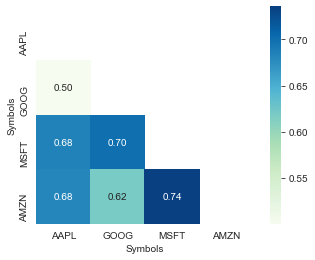

In [46]:
mask = np.triu(tech_returns.corr())
sns.heatmap(tech_returns.corr(), annot=True, cbar=True, cmap='GnBu', fmt='.2f', square=True, mask=mask)

Again, we see all the tech stocks are positively correlated.

##### 6. How much value do we put at risk by investing in a particular stock?

There are many ways to quantify risk.  One of the most basic ways is by comparing the expected return with the standard deviation of the return.  Both values can be readily obtained by calling pandas `.mean()` and `.std()` methods on the dataframe.

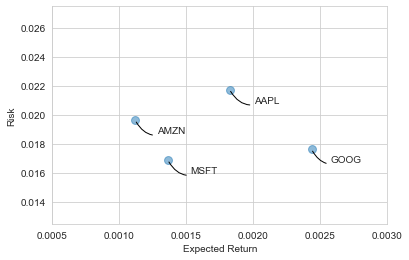

In [47]:
# Set the size of the scatter plot marker
area = np.pi*20

# Plot the scatter plot with the x-axis being the mean or the expected return, 
# adn the y-axis being the risk or the standard deviation.
plt.scatter(x=tech_returns.mean(), y=tech_returns.std(), s=area, alpha=0.5)

# Set the x-axis limits and the y-axis limits
plt.xlim([0.0005, 0.0030])
plt.ylim([0.0125, 0.0275])

# Set the plot axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(tech_returns.columns, tech_returns.mean(), tech_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, -15),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5', color='black'))

Ideally, we want to purchase stocks with high expected return and low risk.  Looking at the graph above, relatively GOOG seems to be the best choice.  It has the highest return with a fairly low risk.

Let's dive in deeper on this analysis by defining a **value at risk** parameter for our stocks.  We can treat **value at risk** as the amount of money we could expect to lose (a.k.a. putting at risk) for a given confidence level.  There are several methods to estimate a value at risk.  We will explore two of them: *Bootstrap* and *Monte Carlo Simulation*.

Let's first explore the *Bootstrap* method.  In the next question, we will explore the *Monte Carlo Simulation* method.

###### Value At Risk:  Bootstrap Method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's take a look at the histogram of daily return for AAPL.

<AxesSubplot:xlabel='AAPL', ylabel='Count'>

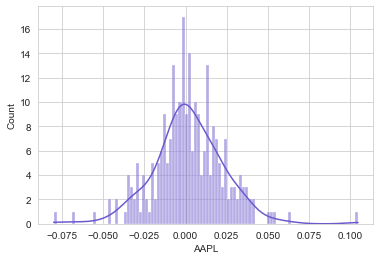

In [48]:
sns.histplot(tech_returns['AAPL'], bins=100, kde=True, color='slateblue')

We can use the pandas `.quantile()` method to determine an empirical quantile for our daily return.

In [49]:
# The 0.05 empirical quantile of daily return for AAPL
tech_returns['AAPL'].quantile(q=0.05)

-0.033102823024433924

The 0.05 empirical quantile of daily returns is at $\approx$-0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%.  If we have a 1 million dollar investment, our one-day 5% VaR is 0.033 * 1,000,000 = $33,000.

We can add a vertical line to the distribution plot at the 0.05 quantile by using the `pyplot.axvline()` method.

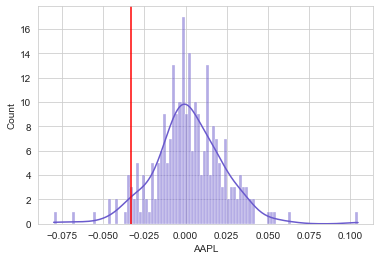

In [52]:
sns.histplot(tech_returns['AAPL'], bins=100, kde=True, color='slateblue')
plt.axvline(x=tech_returns['AAPL'].quantile(q=0.05), color='red')

Let's take a look at the 5% quantile for all tech stocks.

In [53]:
five_percent_quantile = Series(tech_returns.quantile(q=0.05), name='5% quantile')
five_percent_quantile

Symbols
AAPL   -0.033103
GOOG   -0.028011
MSFT   -0.027448
AMZN   -0.029935
Name: 5% quantile, dtype: float64

We see that MSFT has the lowest VaR followed by GOOG, AMZN and AAPL.

Let's graph the returns with the 5% quantile.

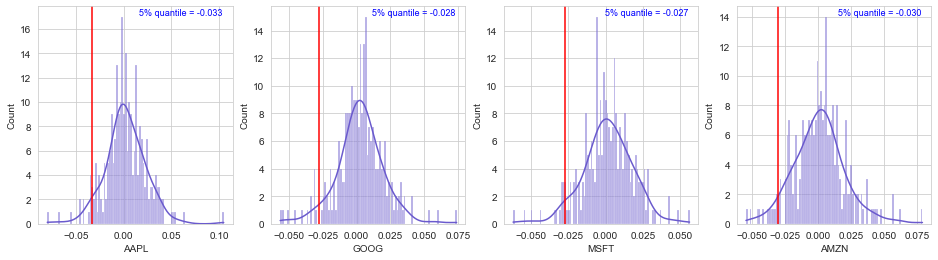

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for col, ax in zip(tech_returns.columns, axes.flatten()):
    sns.histplot(data=tech_returns[col], ax=ax, bins=100, kde=True, color='slateblue')
    ax.axvline(x=tech_returns[col].quantile(q=0.05), color='red')
    text = '5%% quantile = %.3f' %(tech_returns[col].quantile(q=0.05))
    ax.text(0.95, 0.95, text, verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='blue', fontsize=9)

##### 7. How can we attempt to predict future stock behavior?

According to the *Efficient Market Hypothesis*, stocks always trade at their fair value on exchanges, making it impossible for investors to purchase undervalued stocks or sell stocks for inflated prices.  Therefore, it should be impossible to outperform the overall market through expert stock selection or market timing, and the only way an investor can obtain higher returns is by purchasing riskier investments.

Even though we cannot accurately predict future price of a stock, we can certainly characterize its behavior stochastically.  This leads us to the *Geometric Brownian Motion* model for stock behavior.  Through the help *Monte Carlo Simulation*, we can estimate a Value at Risk with each stock we purchase.

###### Value at Risk: Monte Carlso Simulation

One of the most common ways to estimate risk is through the use of Monte Carlo Simulation.  A Monte Carlo Simulation is an attempt to predict the future many times over.  At the end of the simulation, thousands or millions of 'random trials' produce a **distribution** of outsomes that can be analyzed.

To conduct a Monte Carlo Simulation, we first need to specify a model to describe the market behavior.  For this analysis, we will use the Geometric Brownian Motion (GBM), which is technically a Markow process (the outcome only depends on the current condition and independent of past history).  This means the stock price follows a random walk and is consistent with (at the very least) the weak form of the *efficient market hypothesis* - past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.  [Investopedia](https://www.investopedia.com/articles/07/montecarlo.asp) offers more explanation on this model.

The formulat for GBM is:

$$
\frac{\Delta S}{S} = \mu\Delta t + \sigma\epsilon\sqrt{\Delta t}
$$

where

$S = $ stock price

$\Delta S = $ the change in stock price

$\mu = $ the expected return

$\sigma = $ the standard deviation of returns

$\epsilon = $ the random variable

$\Delta t = $ the elapsed time period

We can rearrange the formula to solve for the change in stock price $\Delta S$:

$$
\Delta S = S \times (\mu\Delta t + \sigma\epsilon\sqrt{\Delta t})
$$

In the equation above, the first term is known as a *drift* and the second term is a *shock*.  For each time period, our model assumes the price will "drift" up by expected return.  But the drift will be shocked (added or subtracted) by a random shock.  The random shock will be the standard deviation $\sigma$ multiplied by a random number $\epsilon$.  A more mathematical treatment can be found [here](https://www.youtube.com/watch?v=6mi7vCaIgdU).

First let's define the variables we will be using in the Monte Carlo Simulation.

In [83]:
# Define time horizon to be 1 year or 365 days.
days = 365

# Define delta t
dt = 1/days

# Calculate the mean of the stock returns in interests.  Let's use GOOG.
mu = tech_returns['GOOG'].mean()

# Calculate the volatility.
sigma = tech_returns['GOOG'].std()

Let's now write a function that will run one turn of Monte Carlo Simulation.  The input to the functions are:
1. starting price
2. time horizon
3. mean of the returns
4. standard deviation of the returns

In [84]:
def Monte_Carlo_stock(start_price, days, dt, mu, sigma):
    ''' 
        This function takes in starting stock price, days of simulation, time step,
        mean of the returns and standard deviation of the returns.  The function
        returns simulated price array.
    '''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define drift and shock arrays
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    # Run price array for the time horizon
    for day in range(1,days):
        
        # Calculate drift
        drift[day] = mu * dt
        
        # Calculate shock
        shock[day] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        # Calculate price
        price[day] = price[day-1] + price[day-1]*(drift[day] + shock[day])
        
    return price    

Let's try our simulation for 100 runs.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

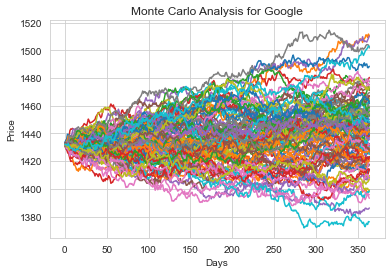

In [85]:
# Get start price from GOOG.head()
start_price = tech_prices['GOOG'].iloc[0]

for run in range(100):
    plt.plot(Monte_Carlo_stock(start_price,days,dt,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Great!  Our simulation works!  Let's now run the simulation for a bigger number of runs and tally up the end results in a histogram.

In [86]:
# Set the number of runs
runs = 10000

# Create a list to hold the end results
end_prices = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(0,runs):
    end_prices[run] = Monte_Carlo_stock(start_price,days,dt,mu,sigma)[-1]

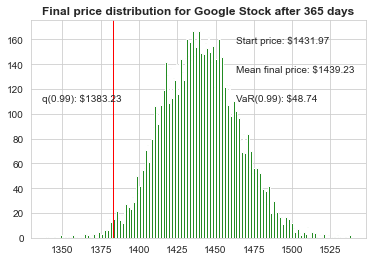

In [87]:
# Now we'll define q as the 1% empirical qunatile, this basically means
# that 99% of the values should fall above this value.
q = np.percentile(end_prices, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(end_prices,bins=200, color='forestgreen')

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % end_prices.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=1, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

What this graph tells us is that for every initial stock we purchase at \\$1431.97, we are putting about \\$49.53 at risk 99% of the time from our Monte Carlo Simulation!